# Load the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
 
from sklearn import metrics 
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score

# Load the dataset

In [6]:
import opendatasets as od
import pandas
 
od.download("https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter") 

data=pd.read_csv("./prediction-of-asteroid-diameter/Asteroid.csv")

print("shape of the data ; ", data.shape)

data=data.loc[:,['a', 'e', 'G', 'i', 'om', 'w', 'q', 'ad', 'per_y',
       'data_arc', 'condition_code', 'n_obs_used', 'H', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'neo',
       'pha', 'moid','diameter']]

data.head()

Skipping, found downloaded files in "./prediction-of-asteroid-diameter" (use force=True to force download)
shape of the data ;  (839736, 27)


,a,e,G,i,om,w,q,ad,per_y,data_arc,...,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid,diameter
0,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478,939.4
1,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324,545
2,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454,246.596
3,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948,525.4
4,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,...,NaN,0.826,0.411,NaN,S,S,N,N,1.09589,106.699


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               839734 non-null  float64
 1   e               839736 non-null  float64
 2   G               119 non-null     float64
 3   i               839736 non-null  float64
 4   om              839736 non-null  float64
 5   w               839736 non-null  float64
 6   q               839736 non-null  float64
 7   ad              839730 non-null  float64
 8   per_y           839735 non-null  float64
 9   data_arc        823947 non-null  float64
 10  condition_code  838743 non-null  object 
 11  n_obs_used      839736 non-null  int64  
 12  H               837042 non-null  float64
 13  extent          18 non-null      object 
 14  albedo          136452 non-null  float64
 15  rot_per         18796 non-null   float64
 16  GM              14 non-null      float64
 17  BV        

## Find the percentage of missing values in the data
- Columns with no missing data : e, i, om, w, q, n_obs_used
- columns with less missing data that can be imputed : a, ad, per_y, data_arc, condition_code, H, neo, pha, moid
- columns that needs to be removed : g, extent, albedo, rot_per, GM, BV, UB, IR, spec_B, spec_T

> The target variable "diameter" is missing more than 80% of data. So we need to remove all the columns that doesn't have data in them 

In [8]:
display(data.isna().sum() / len(data))

a                 0.000002
e                 0.000000
G                 0.999858
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000007
per_y             0.000001
data_arc          0.018802
condition_code    0.001183
n_obs_used        0.000000
H                 0.003208
extent            0.999979
albedo            0.837506
rot_per           0.977617
GM                0.999983
BV                0.998784
UB                0.998834
IR                0.999999
spec_B            0.998016
spec_T            0.998833
neo               0.000007
pha               0.020152
moid              0.020152
diameter          0.836043
dtype: float64

## Removing rows without information about "diameter"

In [9]:
data_clean = data.copy()

data_clean = data_clean[~data_clean["diameter"].isna()]
td = (data_clean.isna().sum() / len(data_clean) > 0.30).reset_index()

rm_cols = td[td[0] == True]["index"].tolist()
print("Columns with missing values : ", rm_cols)

print("Removing the above columns .... ")
data_clean.drop(columns=rm_cols, inplace=True)

print("---- Dataset after removing columns ----")
display(data_clean.isna().sum() / len(data_clean))

display(data_clean.info())

Columns with missing values :  ['G', 'extent', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T']
Removing the above columns .... 
---- Dataset after removing columns ----


a                 0.000000
e                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000000
per_y             0.000000
data_arc          0.001017
condition_code    0.000000
n_obs_used        0.000000
H                 0.005455
albedo            0.008948
neo               0.000000
pha               0.000000
moid              0.000000
diameter          0.000000
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137681 entries, 0 to 810411
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137681 non-null  float64
 1   e               137681 non-null  float64
 2   i               137681 non-null  float64
 3   om              137681 non-null  float64
 4   w               137681 non-null  float64
 5   q               137681 non-null  float64
 6   ad              137681 non-null  float64
 7   per_y           137681 non-null  float64
 8   data_arc        137541 non-null  float64
 9   condition_code  137681 non-null  object 
 10  n_obs_used      137681 non-null  int64  
 11  H               136930 non-null  float64
 12  albedo          136449 non-null  float64
 13  neo             137681 non-null  object 
 14  pha             137681 non-null  object 
 15  moid            137681 non-null  float64
 16  diameter        137681 non-null  object 
dtypes: float64

None

### impute information into missing data

In [10]:
for col in data_clean.columns:
    if data_clean[col].dtype == "object":
        continue
    data_clean[col].fillna(data_clean[col].mean(), inplace=True)

display(data_clean.isna().sum() / len(data_clean))

a                 0.0
e                 0.0
i                 0.0
om                0.0
w                 0.0
q                 0.0
ad                0.0
per_y             0.0
data_arc          0.0
condition_code    0.0
n_obs_used        0.0
H                 0.0
albedo            0.0
neo               0.0
pha               0.0
moid              0.0
diameter          0.0
dtype: float64

## statistics of the dataset

In [11]:
data_clean.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid
count,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.000000,137681.00000,137681.000000
mean,2.814524,0.145478,10.350850,169.828953,181.899755,2.402551,3.226496,4.883985,8908.726380,659.420951,15.177323,0.13005,1.420091
std,1.522512,0.077571,6.835959,102.713335,103.557593,0.516136,2.895918,25.528400,6147.364458,581.894272,1.403763,0.10949,0.512207
min,0.626226,0.000489,0.021855,0.000735,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.00100,0.000166
25%,2.536647,0.089611,5.121634,82.330040,91.936169,2.068879,2.864377,4.040156,6266.000000,214.000000,14.400000,0.05300,1.082470
50%,2.750781,0.138538,9.391666,160.438501,183.662427,2.363854,3.167360,4.562389,7497.000000,483.000000,15.300000,0.07900,1.384900
75%,3.092506,0.191134,13.742347,256.279729,271.761175,2.685776,3.468510,5.438437,9652.000000,958.000000,16.100000,0.18700,1.699330
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,29.900000,1.00000,39.507000


In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137681 entries, 0 to 810411
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137681 non-null  float64
 1   e               137681 non-null  float64
 2   i               137681 non-null  float64
 3   om              137681 non-null  float64
 4   w               137681 non-null  float64
 5   q               137681 non-null  float64
 6   ad              137681 non-null  float64
 7   per_y           137681 non-null  float64
 8   data_arc        137681 non-null  float64
 9   condition_code  137681 non-null  object 
 10  n_obs_used      137681 non-null  int64  
 11  H               137681 non-null  float64
 12  albedo          137681 non-null  float64
 13  neo             137681 non-null  object 
 14  pha             137681 non-null  object 
 15  moid            137681 non-null  float64
 16  diameter        137681 non-null  object 
dtypes: float64

## Deep Dive into A:
- semi major axis
- Definition : The Semi-Major Axis (referred to as 'SMA' or 'a') is the distance from the center of an ellipse to the longer end of the ellipse. In a circle, the SMA is simply the radius. The semi-major axis determines various properties of the orbit such as orbital energy and orbital period.

> Hypothesis : Based on the definition, this should be correlated to the size of the asteroid (diameter)

In [13]:
data_clean["a"].describe()

count    137681.000000
mean          2.814524
std           1.522512
min           0.626226
25%           2.536647
50%           2.750781
75%           3.092506
max         389.145964
Name: a, dtype: float64

In [14]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Percentage of data removed :  0.02458581794147341


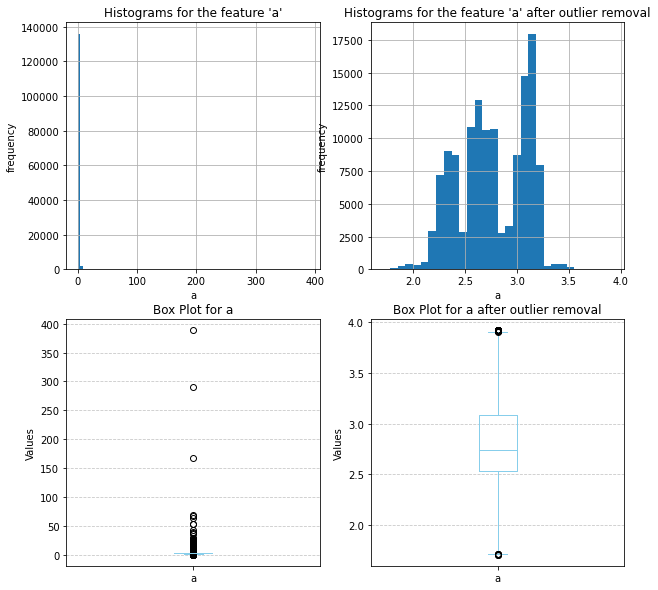

In [15]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean["a"], bins=100)
ax[0,0].set_title("Histograms for the feature 'a'")
ax[0,0].set_xlabel("a")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean["a"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"a"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)


data_clean_outlier = remove_outliers_iqr(data_clean, "a")
# data_clean_outlier = data_clean[data_clean["a"] <= 4]
print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["a"], bins=30)
ax[0,1].set_title("Histograms for the feature 'a' after outlier removal")
ax[0,1].set_xlabel("a")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["a"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"a"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep Dive into e
- Eccentricity 
- indicates how eccentric the asteroid body in terms of eclipse.
- There are some outliers as per the histogram and box plot but we believe its due to the non-linearity of the data

> Hypothesis : Since this is related to eccentricy, we don't think its highly correlated to diameter

In [16]:
data_clean["e"].describe()

count    137681.000000
mean          0.145478
std           0.077571
min           0.000489
25%           0.089611
50%           0.138538
75%           0.191134
max           0.984348
Name: e, dtype: float64

Percentage of data removed :  0.033701091653895565


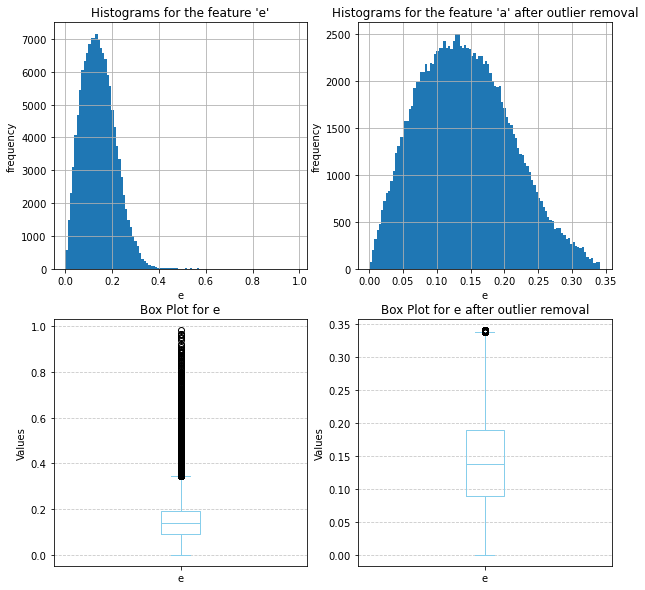

In [17]:
# fig, ax = plt.subplots(1,2, figsize=(10,5))

# ax[0].hist(data_clean_outlier["e"], bins=100)
# ax[0].set_title("Histograms for the feature 'e'")
# ax[0].set_xlabel("e")
# ax[0].set_ylabel("frequency")
# ax[0].grid(True)

# data_clean_outlier["e"].plot(kind='box', color='skyblue', ax=ax[1])
# ax[1].set_title(f'Box Plot for {"e"}')
# ax[1].set_ylabel('Values')
# ax[1].grid(axis='y', linestyle='--', alpha=0.7)

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean["e"], bins=100)
ax[0,0].set_title("Histograms for the feature 'e'")
ax[0,0].set_xlabel("e")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean["e"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"e"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# data_clean_outlier = data_clean_outlier[data_clean_outlier["e"] <= 0.4]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "e")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["e"], bins=100)
ax[0,1].set_title("Histograms for the feature 'a' after outlier removal")
ax[0,1].set_xlabel("e")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["e"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"e"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep Dive into "i"
- inclination angle with respect to x-y axis
- There are some outliers as well but there are lot of outliers, we can revisit cleaning after modelling phase 1


In [18]:
data_clean_outlier["i"].describe()

count    133041.000000
mean         10.197216
std           6.532331
min           0.021855
25%           5.077934
50%           9.325880
75%          13.602137
max          64.055137
Name: i, dtype: float64

Percentage of data removed :  0.06313144152061645


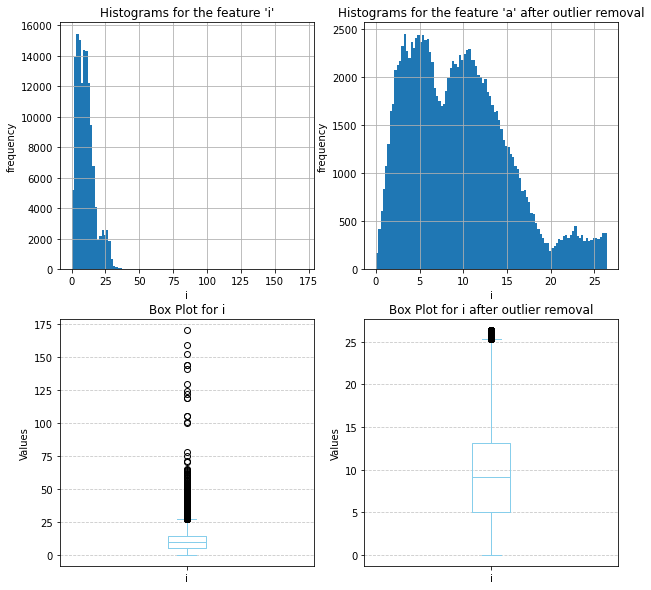

In [19]:
# fig, ax = plt.subplots(1,2, figsize=(10,5))

# ax[0].hist(data_clean_outlier["i"], bins=100)
# ax[0].set_title("Histograms for the feature 'i'")
# ax[0].set_xlabel("i")
# ax[0].set_ylabel("frequency")
# ax[0].grid(True)

# data_clean_outlier["i"].plot(kind='box', color='skyblue', ax=ax[1])
# ax[1].set_title(f'Box Plot for {"i"}')
# ax[1].set_ylabel('Values')
# ax[1].grid(axis='y', linestyle='--', alpha=0.7)

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean["i"], bins=100)
ax[0,0].set_title("Histograms for the feature 'i'")
ax[0,0].set_xlabel("i")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean["i"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"i"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# data_clean_outlier = data_clean_outlier[data_clean_outlier["i"] <= 30]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "i")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["i"], bins=100)
ax[0,1].set_title("Histograms for the feature 'a' after outlier removal")
ax[0,1].set_xlabel("i")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["i"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"i"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Deep Dive into om
- mean anamoly
- Definition : It is simply a convenient uniform measure of how far around its orbit a body has progressed since pericenter. The mean anomaly is one of three angular parameters (known historically as "anomalies") that define a position along an orbit, the other two being the eccentric anomaly and the true anomaly.

In [20]:
data_clean_outlier["om"].describe()

count    128989.000000
mean        170.230241
std         102.792775
min           0.000735
25%          82.632680
50%         161.001619
75%         257.028802
max         359.990858
Name: om, dtype: float64

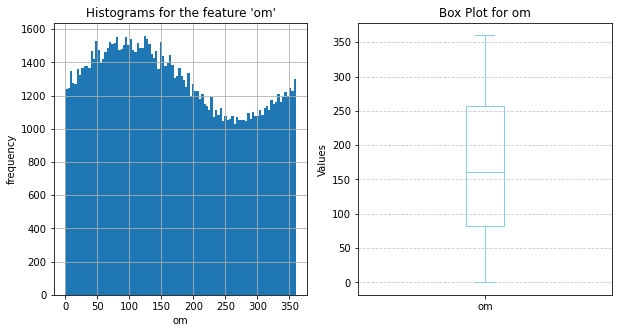

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(data_clean_outlier["om"], bins=100)
ax[0].set_title("Histograms for the feature 'om'")
ax[0].set_xlabel("om")
ax[0].set_ylabel("frequency")
ax[0].grid(True)

data_clean_outlier["om"].plot(kind='box', color='skyblue', ax=ax[1])
ax[1].set_title(f'Box Plot for {"om"}')
ax[1].set_ylabel('Values')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

## Deep dive into "w"
- Weight factor (not sure)
- Good thing, it doesn't have any outlier so no need to trim anything

In [22]:
data_clean_outlier["w"].describe()

count    128989.000000
mean        181.933942
std         103.546069
min           0.004466
25%          91.872555
50%         183.739331
75%         271.713285
max         359.995174
Name: w, dtype: float64

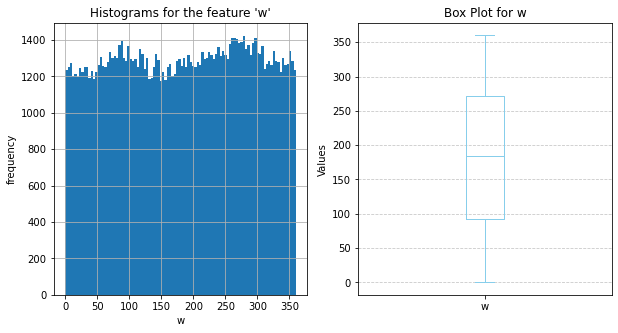

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(data_clean_outlier["w"], bins=100)
ax[0].set_title("Histograms for the feature 'w'")
ax[0].set_xlabel("w")
ax[0].set_ylabel("frequency")
ax[0].grid(True)

data_clean_outlier["w"].plot(kind='box', color='skyblue', ax=ax[1])
ax[1].set_title(f'Box Plot for {"w"}')
ax[1].set_ylabel('Values')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

## Deep dive into "q"
- perihilion distance(q)
- Definition : Minimal distance from the Sun that the object reaches along its elliptic orbit.
- There are many outliers, So we are goinf to remove values which is more than 25

In [24]:
data_clean_outlier["q"].describe()

count    128989.000000
mean          2.373251
std           0.360619
min           1.226548
25%           2.071286
50%           2.355290
75%           2.673224
max           3.832018
Name: q, dtype: float64

Percentage of data removed :  0.063196810017359


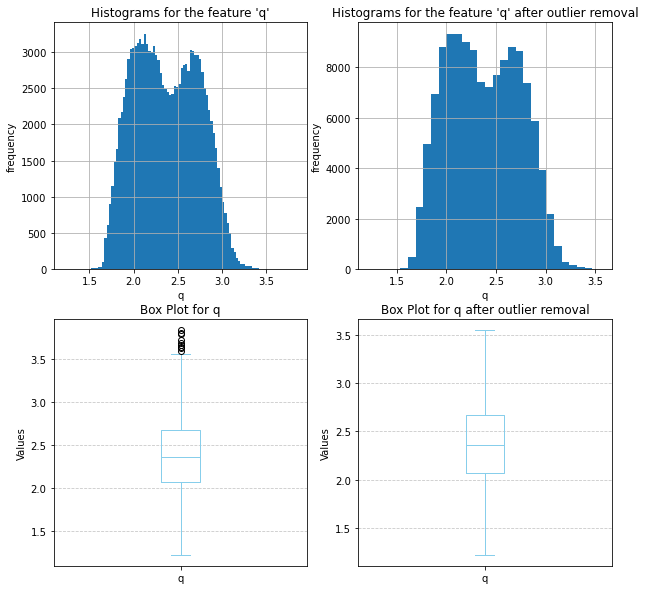

In [25]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean_outlier["q"], bins=100)
ax[0,0].set_title("Histograms for the feature 'q'")
ax[0,0].set_xlabel("q")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean_outlier["q"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"q"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# data_clean_outlier = data_clean_outlier[data_clean_outlier["q"] <= 4]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "q")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))


ax[0,1].hist(data_clean_outlier["q"], bins=30)
ax[0,1].set_title("Histograms for the feature 'q' after outlier removal")
ax[0,1].set_xlabel("q")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["q"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"q"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep dive into "ad"
- cannot find definition
- This feature has some extreme outliers so we are removing values greater than 80

In [26]:
data_clean_outlier["ad"].describe()

count    128980.000000
mean          3.147920
std           0.392350
min           1.834498
25%           2.855496
50%           3.146058
75%           3.431475
max           5.132008
Name: ad, dtype: float64

Percentage of data removed :  0.06417733746849597


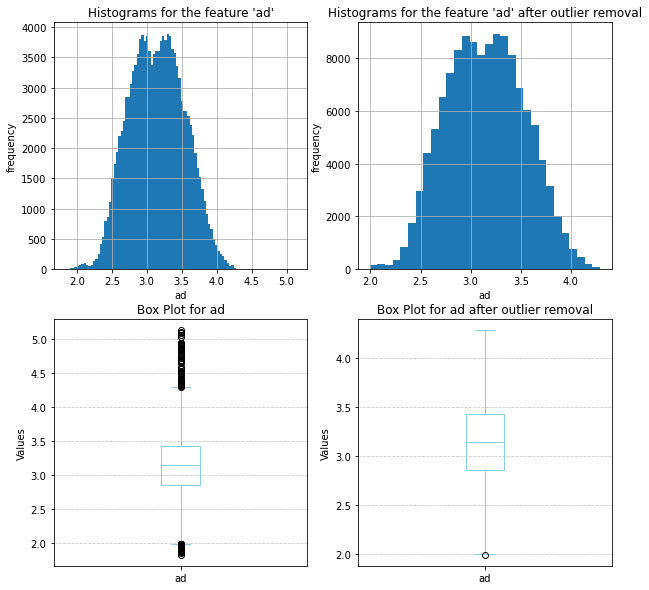

In [27]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean_outlier["ad"], bins=100)
ax[0,0].set_title("Histograms for the feature 'ad'")
ax[0,0].set_xlabel("ad")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean_outlier["ad"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"ad"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

data_clean_outlier = data_clean_outlier[data_clean_outlier["ad"] <= 5]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "ad")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["ad"], bins=30)
ax[0,1].set_title("Histograms for the feature 'ad' after outlier removal")
ax[0,1].set_xlabel("ad")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["ad"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"ad"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep dive into per_y
- sidereal orbit period (year)
- There are some extreme outliers hence, we can remove the values greater than 150 but I dont think we should remove them

In [28]:
data_clean_outlier["per_y"].describe()

count    128845.000000
mean          4.610777
std           0.804373
min           2.237624
25%           4.020415
50%           4.536613
75%           5.399722
max           7.708844
Name: per_y, dtype: float64

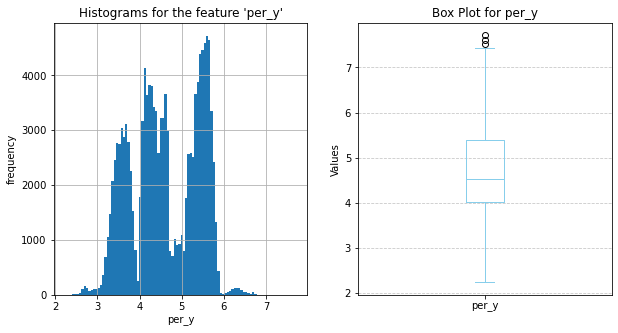

In [29]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(data_clean_outlier["per_y"], bins=100)
ax[0].set_title("Histograms for the feature 'per_y'")
ax[0].set_xlabel("per_y")
ax[0].set_ylabel("frequency")
ax[0].grid(True)

data_clean_outlier["per_y"].plot(kind='box', color='skyblue', ax=ax[1])
ax[1].set_title(f'Box Plot for {"per_y"}')
ax[1].set_ylabel('Values')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

## Deep dive into data_arc

In [30]:
data_clean_outlier["data_arc"].describe()

count    128845.000000
mean       9021.297040
std        6142.962284
min           1.000000
25%        6316.000000
50%        7551.000000
75%        9712.000000
max       72684.000000
Name: data_arc, dtype: float64

Percentage of data removed :  0.20928087390416983


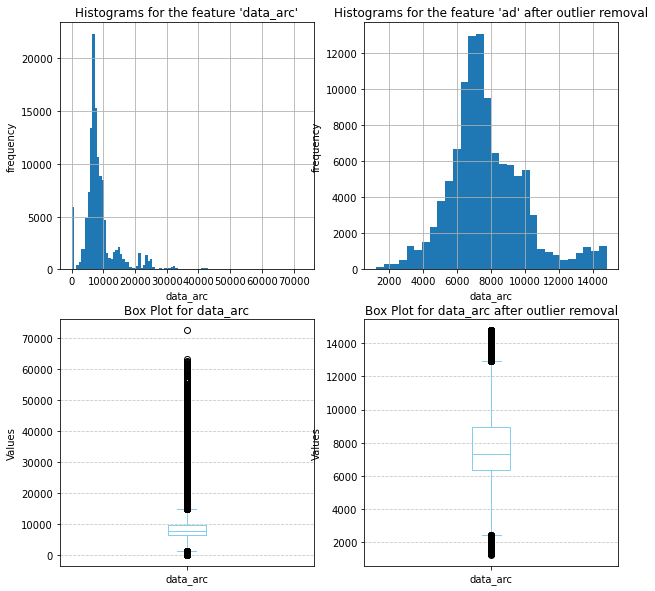

In [31]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean_outlier["data_arc"], bins=100)
ax[0,0].set_title("Histograms for the feature 'data_arc'")
ax[0,0].set_xlabel("data_arc")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean_outlier["data_arc"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"data_arc"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# data_clean_outlier = data_clean_outlier[data_clean_outlier["n_obs_used"] <= 2500]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "data_arc")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["data_arc"], bins=30)
ax[0,1].set_title("Histograms for the feature 'ad' after outlier removal")
ax[0,1].set_xlabel("data_arc")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["data_arc"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"data_arc"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep dive in n_obs_user
- number of observations used
- There are some outlier w.r.t boxplot but the histogram indicates this is a exponential distribution

> Hypothesis: Since there is a feature with exponential distribution, its better to use a non-linear algorithm to predict the target variable


In [32]:
data_clean_outlier["n_obs_used"].describe()

count    108867.000000
mean        593.647000
std         449.696902
min           5.000000
25%         233.000000
50%         470.000000
75%         856.000000
max        3359.000000
Name: n_obs_used, dtype: float64

Percentage of data removed :  0.22161373028958242


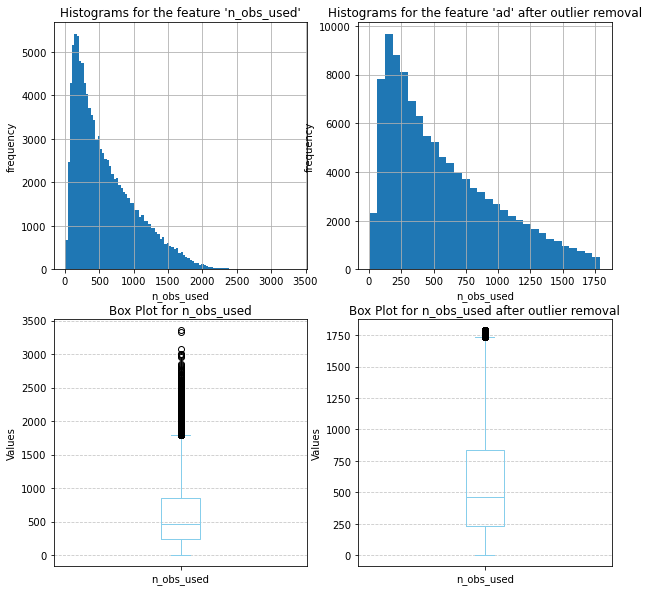

In [33]:
# fig, ax = plt.subplots(1,2, figsize=(10,5))

# ax[0].hist(data_clean_outlier["n_obs_used"], bins=100)
# ax[0].set_title("Histograms for the feature 'n_obs_used'")
# ax[0].set_xlabel("n_obs_used")
# ax[0].set_ylabel("frequency")
# ax[0].grid(True)

# data_clean_outlier["n_obs_used"].plot(kind='box', color='skyblue', ax=ax[1])
# ax[1].set_title(f'Box Plot for {"n_obs_used"}')
# ax[1].set_ylabel('Values')
# ax[1].grid(axis='y', linestyle='--', alpha=0.7)

fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean_outlier["n_obs_used"], bins=100)
ax[0,0].set_title("Histograms for the feature 'n_obs_used'")
ax[0,0].set_xlabel("n_obs_used")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean_outlier["n_obs_used"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"n_obs_used"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# data_clean_outlier = data_clean_outlier[data_clean_outlier["n_obs_used"] <= 2500]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "n_obs_used")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["n_obs_used"], bins=30)
ax[0,1].set_title("Histograms for the feature 'ad' after outlier removal")
ax[0,1].set_xlabel("n_obs_used")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["n_obs_used"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"n_obs_used"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep Dive into "H"


In [34]:
data_clean_outlier["H"].describe()

count    107169.000000
mean         15.381490
std           1.023424
min           3.340000
25%          14.700000
50%          15.400000
75%          16.100000
max          19.200000
Name: H, dtype: float64

Percentage of data removed :  0.22441731248320396


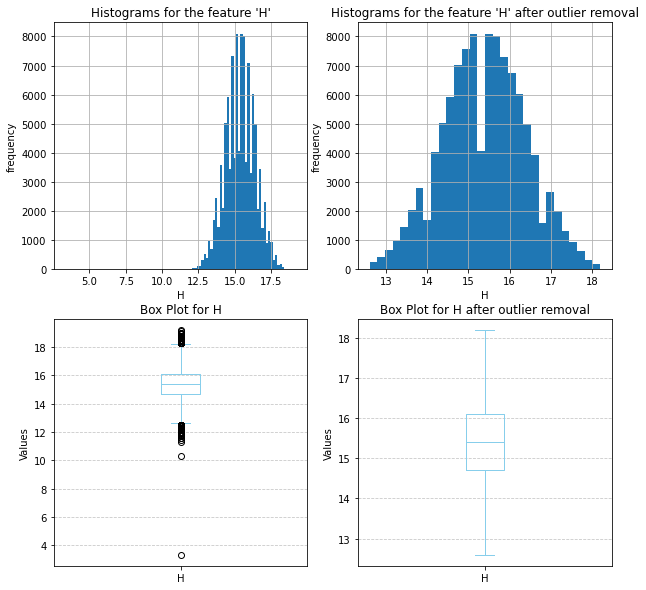

In [35]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean_outlier["H"], bins=100)
ax[0,0].set_title("Histograms for the feature 'H'")
ax[0,0].set_xlabel("H")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean_outlier["H"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"H"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# data_clean_outlier = data_clean_outlier[data_clean_outlier["n_obs_used"] <= 2500]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "H")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["H"], bins=30)
ax[0,1].set_title("Histograms for the feature 'H' after outlier removal")
ax[0,1].set_xlabel("H")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["H"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"H"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep dive into albedo

In [36]:
data_clean_outlier["albedo"].describe()

count    106783.000000
mean          0.126957
std           0.105986
min           0.001000
25%           0.053000
50%           0.077000
75%           0.182000
max           1.000000
Name: albedo, dtype: float64

Percentage of data removed :  0.24788460281375058


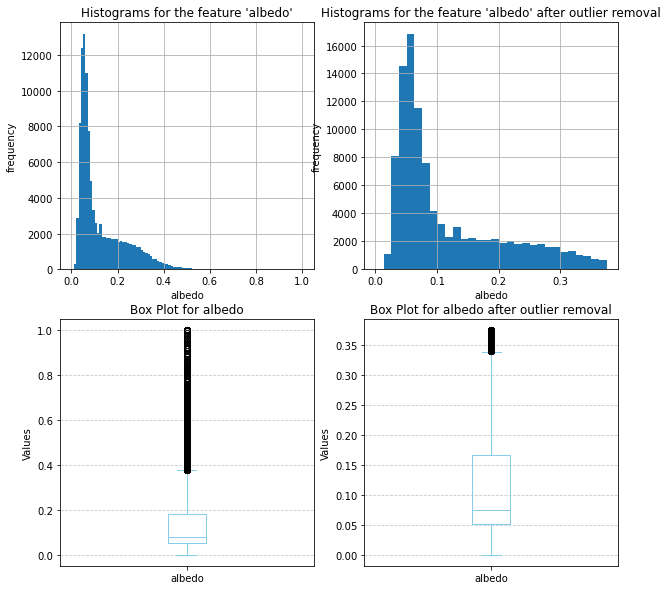

In [37]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].hist(data_clean_outlier["albedo"], bins=100)
ax[0,0].set_title("Histograms for the feature 'albedo'")
ax[0,0].set_xlabel("albedo")
ax[0,0].set_ylabel("frequency")
ax[0,0].grid(True)

data_clean_outlier["albedo"].plot(kind='box', color='skyblue', ax=ax[1,0])
ax[1,0].set_title(f'Box Plot for {"albedo"}')
ax[1,0].set_ylabel('Values')
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# data_clean_outlier = data_clean_outlier[data_clean_outlier["n_obs_used"] <= 2500]
data_clean_outlier = remove_outliers_iqr(data_clean_outlier, "albedo")

print("Percentage of data removed : ", 1 - (len(data_clean_outlier) / len(data_clean)))

ax[0,1].hist(data_clean_outlier["albedo"], bins=30)
ax[0,1].set_title("Histograms for the feature 'albedo' after outlier removal")
ax[0,1].set_xlabel("albedo")
ax[0,1].set_ylabel("frequency")
ax[0,1].grid(True)

data_clean_outlier["albedo"].plot(kind='box', color='skyblue', ax=ax[1,1])
ax[1,1].set_title(f'Box Plot for {"albedo"} after outlier removal')
ax[1,1].set_ylabel('Values')
ax[1,1].grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Deep dive into "moid"
- The minimum orbital intersection distance (MOID)
- Definition : The minimum orbital intersection distance (MOID) is used as a measure to assess potential close approaches and collision risks between astronomical objects. Methods to calculate this quantity have been proposed in several previous publications.
- There are some outlier but we are not going to remove it as it can be a non linear distribution


> Hypothesis : based on the definition, this shouldn't correlate a lot with the target variable

In [38]:
data_clean_outlier["moid"].describe()

count    103552.000000
mean          1.418408
std           0.356695
min           0.332123
25%           1.120520
50%           1.422285
75%           1.709415
max           2.551540
Name: moid, dtype: float64

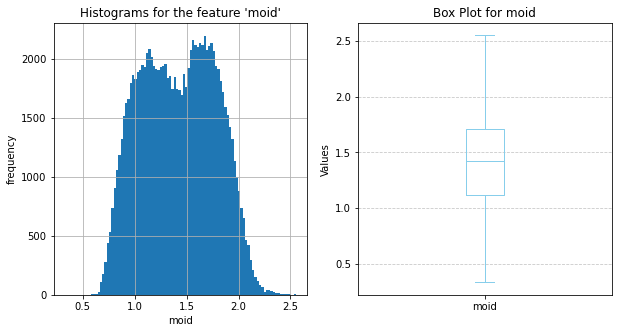

In [39]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].hist(data_clean_outlier["moid"], bins=100)
ax[0].set_title("Histograms for the feature 'moid'")
ax[0].set_xlabel("moid")
ax[0].set_ylabel("frequency")
ax[0].grid(True)

data_clean_outlier["moid"].plot(kind='box', color='skyblue', ax=ax[1])
ax[1].set_title(f'Box Plot for {"moid"}')
ax[1].set_ylabel('Values')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

## Deep dive into diameter
- Even though the diameter is 'object' type but the data type is actually numeric
- remove values greater than 150

### changing the diameter to float 64

In [40]:
data_clean_outlier["diameter"] = data_clean_outlier["diameter"].astype("float64")
print("Data type of 'diameter' has been changed !")

Data type of 'diameter' has been changed !


## Deep dive into condition code
- Definiton : The orbit condition code, also known as the U uncertainty parameter, is an integer between 0 and 9 indicating how well an object's orbit is known on a logarithmic scale, where 0 indicates a well-determined orbit.
- So this should be of float type

In [41]:
data_clean_outlier["condition_code"] = data_clean_outlier["condition_code"].astype("float64").astype("category")
print("Data type of 'condition_code' has been changed !")

Data type of 'condition_code' has been changed !


## Deep Dive into neo
- Definition : Near Earth Object
- Its a flag, so it should be of categorical type

In [42]:
data_clean_outlier["neo"] = data_clean_outlier["neo"].astype("category")
print("Data type of 'neo' has been changed to category ! ")

Data type of 'neo' has been changed to category ! 


## Deep Dive into PHA
- Definition : Potentially Hazardous Asteriod
- Its a flag, so it should be of categorical type

In [43]:
data_clean_outlier["pha"] = data_clean_outlier["pha"].astype("category")
print("Data type of 'pha' has been changed to category ! ")

Data type of 'pha' has been changed to category ! 


## Checking for outliers
- There are some outliers in the data. Columns with heavy outliers

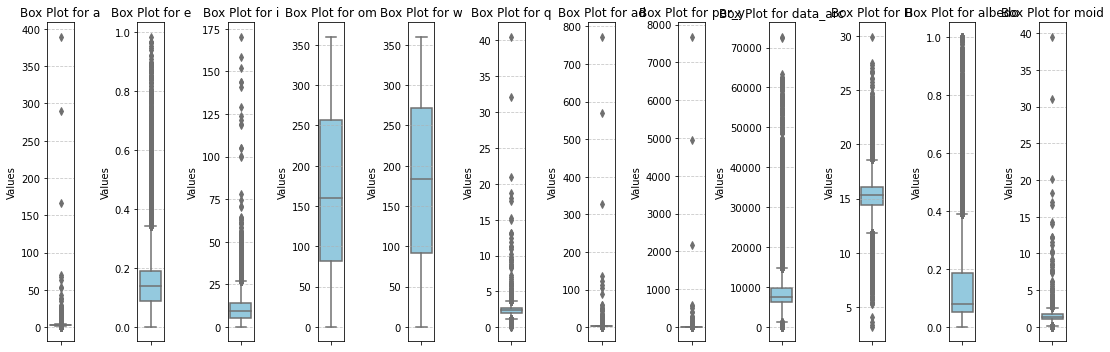

In [44]:
# Create box plots for each column in a single row
data_clean_numeric = data_clean.select_dtypes(include=["float64"])

fig, axes = plt.subplots(1, len(data_clean_numeric.columns), figsize=(15, 5))

for i, column in enumerate(data_clean_numeric.columns):
    sns.boxplot(ax=axes[i], y=data_clean_numeric[column], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel('Values')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### After outlier removal

In [45]:
data_clean_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103552 entries, 3074 to 799788
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   a               103552 non-null  float64 
 1   e               103552 non-null  float64 
 2   i               103552 non-null  float64 
 3   om              103552 non-null  float64 
 4   w               103552 non-null  float64 
 5   q               103552 non-null  float64 
 6   ad              103552 non-null  float64 
 7   per_y           103552 non-null  float64 
 8   data_arc        103552 non-null  float64 
 9   condition_code  103552 non-null  category
 10  n_obs_used      103552 non-null  int64   
 11  H               103552 non-null  float64 
 12  albedo          103552 non-null  float64 
 13  neo             103552 non-null  category
 14  pha             103552 non-null  category
 15  moid            103552 non-null  float64 
 16  diameter        103552 non-null  fl

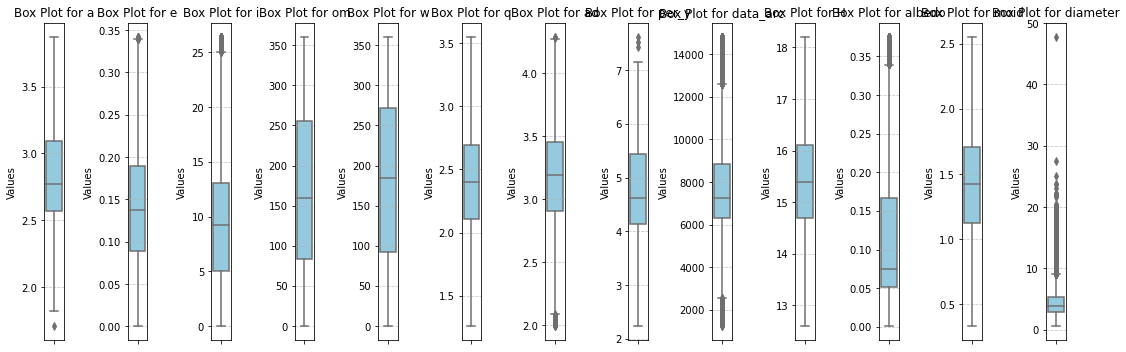

In [46]:
# Create box plots for each column in a single row
data_clean_numeric = data_clean_outlier.select_dtypes(include=["float64"])

fig, axes = plt.subplots(1, len(data_clean_numeric.columns), figsize=(15, 5))

for i, column in enumerate(data_clean_numeric.columns):
    sns.boxplot(ax=axes[i], y=data_clean_numeric[column], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel('Values')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Feature Engineering

## plot the correlation map

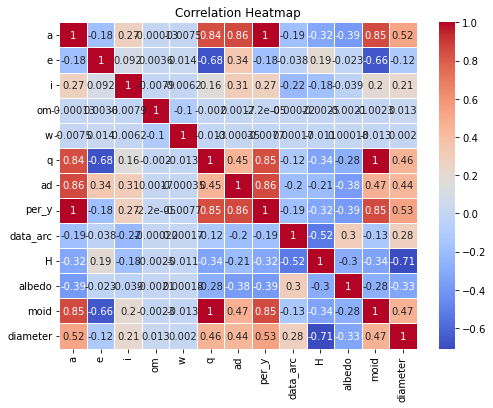

In [47]:
correlation_matrix = data_clean_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### find all the features which has high correlation with the target variable
- the features : i, w, om, e, condition_code have very low correlation values

In [48]:
intra_corr = {}

for column in data_clean_outlier.columns:
    if column == "diameter" or data_clean_outlier[column].dtype == "category":
        continue
    intra_corr[column] = data_clean_outlier[column].corr(data_clean_outlier["diameter"])

intra_corr = dict(sorted(intra_corr.items(), key=lambda x : x[1], reverse=True))
intra_corr

{'per_y': 0.5266917059065643,
 'a': 0.5249683803331965,
 'moid': 0.4652325766476966,
 'q': 0.45837162791524744,
 'ad': 0.43684613969451386,
 'n_obs_used': 0.40708353894879046,
 'data_arc': 0.2796521895759672,
 'i': 0.21406596346720785,
 'om': 0.013086038726404398,
 'w': 0.0020155057102918053,
 'e': -0.1195480162435545,
 'albedo': -0.3298463095781219,
 'H': -0.7082327923502671}

In [49]:
# find the correlation between the featurs
inter_corr = {}

for col1 in data_clean_outlier.columns:
    for col2 in data_clean_outlier.columns:
        if col1 == "diameter" or \
            col2 == "diameter" or \
            col1 == col2 or \
            data_clean_outlier[col1].dtype == "category" or \
            data_clean_outlier[col2].dtype == "category":
            continue
        # if (col1, col2) not in inter_corr and (col2, col1) not in inter_corr:
        if col1 not in inter_corr:
            inter_corr[col1] = {}
        inter_corr[col1][col2] = data_clean_outlier[col1].corr(data_clean_outlier[col2])


# inter_corr = dict(sorted(inter_corr.items(), key=lambda x : x[1], reverse = True))
inter_corr

{'a': {'e': -0.1821099027473174,
  'i': 0.27435365804634665,
  'om': -0.00013187081701228595,
  'w': -0.007486550852802058,
  'q': 0.8449580568647433,
  'ad': 0.8591073882832315,
  'per_y': 0.9996641839031369,
  'data_arc': -0.18754140280186635,
  'n_obs_used': -0.22367467891459214,
  'H': -0.3214287566731757,
  'albedo': -0.38541625162378695,
  'moid': 0.852838316752806},
 'e': {'a': -0.1821099027473174,
  'i': 0.09239899565304985,
  'om': 0.003613545474166815,
  'w': 0.013950425924131413,
  'q': -0.6770382713411511,
  'ad': 0.34417651942259136,
  'per_y': -0.1827750534930936,
  'data_arc': -0.03805109939889596,
  'n_obs_used': -0.07848055281724257,
  'H': 0.18614469696764585,
  'albedo': -0.023177766683608894,
  'moid': -0.6620173612563958},
 'i': {'a': 0.27435365804634665,
  'e': 0.09239899565304983,
  'om': -0.007944594004883626,
  'w': -0.006196071709779801,
  'q': 0.15569216780614523,
  'ad': 0.308545429292921,
  'per_y': 0.27435926425387763,
  'data_arc': -0.22186446158276202,
 

In [50]:
# filter all the columns with corr < 0.25 with target variable
intra_corr_filtered = dict(filter(lambda x : abs(x[1]) < 0.2 , intra_corr.items()))
print("list of features with less than 0.2 correlation : ", intra_corr_filtered.keys())
# intra_corr_filtered consists of features with less correlation with target varibale
# Now combine them with the higher correlated variable using pca


for feat in intra_corr_filtered.keys():
    # find the complement feature with highest corr value
    comp_feat = max(inter_corr[feat].items(), key=lambda x : x[1])
    print(feat, comp_feat)


list of features with less than 0.2 correlation :  dict_keys(['om', 'w', 'e'])
om ('e', 0.003613545474166815)
w ('e', 0.013950425924131414)
e ('ad', 0.34417651942259136)


### pearson coefficient for categorical columns

In [51]:
# Convert categorical columns into one-hot encoded format
one_hot_encoded_df = pd.get_dummies(data_clean_outlier[['neo', 'pha', "condition_code"]])

# Concatenate one-hot encoded columns with the target column
df_concat = pd.concat([one_hot_encoded_df, data_clean_outlier['diameter']], axis=1)

# Calculate Pearson correlation coefficients
pearson_corr = df_concat.corr()

# Filter correlation coefficients for target column
pearson_corr_target = pearson_corr['diameter']

# Drop correlation with itself
pearson_corr_target = pearson_corr_target.drop('diameter')

pearson_corr_target

neo_N                 0.003875
neo_Y                -0.003875
pha_N                      NaN
condition_code_0.0    0.100618
condition_code_1.0   -0.075230
condition_code_2.0   -0.043783
condition_code_3.0   -0.023918
condition_code_4.0   -0.018213
condition_code_5.0   -0.024912
condition_code_6.0   -0.016346
condition_code_7.0   -0.007870
condition_code_8.0   -0.003477
condition_code_9.0   -0.024646
Name: diameter, dtype: float64

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

pca_std_scalar = StandardScaler()
scaled_data = pca_std_scalar.fit_transform(data_clean_outlier[intra_corr_filtered.keys()])

N_COMP = 1
pca = PCA(n_components=N_COMP)  # Specify the number of components you want to keep
pca.fit(scaled_data)

transformed_data = pca.transform(scaled_data)
data_clean_outlier_pca = data_clean_outlier.copy()
col_name = "pca_" + "_".join(intra_corr_filtered.keys())

for i in range(N_COMP):
    data_clean_outlier_pca[col_name + "_" + str(i)] = transformed_data[:,i]
    print("corr : ", data_clean_outlier["diameter"].corr(data_clean_outlier_pca[col_name + "_" + str(i)]))

explained_variance = pca.explained_variance_ratio_
print("explained variance : ", explained_variance)

corr :  0.015333248627160227
explained variance :  [0.36835868]


In [53]:
# convert the categorical variables "neo" and "pha" to numerica

# print(list(intra_corr_filtered.keys()) + ["neo", "pha", "diameter"])
cols = list(set(data_clean_outlier.columns.to_list()) - set(list(intra_corr_filtered.keys())))
print(cols)
data_clean_outlier = data_clean_outlier[cols]

data_clean_outlier["neo"].replace({"N" : 0, "Y" : 1}, inplace=True)
data_clean_outlier["pha"].replace({"N" : 0, "Y" : 1}, inplace=True)

data_clean_outlier["neo"] = data_clean_outlier["neo"].astype(int)
data_clean_outlier["pha"] = data_clean_outlier["pha"].astype(int)

dummy_df = pd.get_dummies(data_clean_outlier[['condition_code']])
data_clean_outlier = pd.concat([dummy_df, data_clean_outlier], axis=1)

display(data_clean_outlier.head())
data_clean_outlier.drop(columns=["condition_code"], inplace=True)


data_clean_outlier.head()

['neo', 'a', 'diameter', 'condition_code', 'albedo', 'H', 'i', 'moid', 'ad', 'q', 'n_obs_used', 'pha', 'data_arc', 'per_y']


,condition_code_0.0,condition_code_1.0,condition_code_2.0,condition_code_3.0,condition_code_4.0,condition_code_5.0,condition_code_6.0,condition_code_7.0,condition_code_8.0,condition_code_9.0,...,albedo,H,i,moid,ad,q,n_obs_used,pha,data_arc,per_y
3074,1,0,0,0,0,0,0,0,0,0,...,0.2430,14.0,9.970749,0.966584,2.572578,1.974624,1664,0,13964.0,3.428305
3266,1,0,0,0,0,0,0,0,0,0,...,0.0607,12.8,24.033932,0.732851,3.017378,1.640538,1447,0,14110.0,3.554273
3286,1,0,0,0,0,0,0,0,0,0,...,0.1320,14.1,12.077991,0.695380,3.076322,1.655615,1453,0,13875.0,3.639332
3352,1,0,0,0,0,0,0,0,0,0,...,0.0300,13.6,21.809488,0.707378,2.020661,1.705012,1662,0,14426.0,2.542555
3448,1,0,0,0,0,0,0,0,0,0,...,0.0630,12.8,2.043564,1.627060,3.561016,2.615616,1653,0,14799.0,5.427388


,condition_code_0.0,condition_code_1.0,condition_code_2.0,condition_code_3.0,condition_code_4.0,condition_code_5.0,condition_code_6.0,condition_code_7.0,condition_code_8.0,condition_code_9.0,...,albedo,H,i,moid,ad,q,n_obs_used,pha,data_arc,per_y
3074,1,0,0,0,0,0,0,0,0,0,...,0.2430,14.0,9.970749,0.966584,2.572578,1.974624,1664,0,13964.0,3.428305
3266,1,0,0,0,0,0,0,0,0,0,...,0.0607,12.8,24.033932,0.732851,3.017378,1.640538,1447,0,14110.0,3.554273
3286,1,0,0,0,0,0,0,0,0,0,...,0.1320,14.1,12.077991,0.695380,3.076322,1.655615,1453,0,13875.0,3.639332
3352,1,0,0,0,0,0,0,0,0,0,...,0.0300,13.6,21.809488,0.707378,2.020661,1.705012,1662,0,14426.0,2.542555
3448,1,0,0,0,0,0,0,0,0,0,...,0.0630,12.8,2.043564,1.627060,3.561016,2.615616,1653,0,14799.0,5.427388


### Train test split

In [54]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(data_clean_outlier.drop(columns=['diameter']), 
                                       data_clean_outlier["diameter"],
                                       random_state=5424,
                                       test_size=0.2)

print("x train shape : ", x_train.shape)
print("x test shape : ", x_test.shape)
print("y train shape : ", y_train.shape)
print("y test shape : ", y_test.shape)


x train shape :  (82841, 22)
x test shape :  (20711, 22)
y train shape :  (82841,)
y test shape :  (20711,)


## Since there are columns with non normal distributions, we are going to use normalizer

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scal_cols = x_train.columns.to_list()
scal_cols.remove("neo")
scal_cols.remove("pha")
cond_cols = []
for col in scal_cols:
    if "condition" in col:
        cond_cols.append(col)
for col in cond_cols:
    scal_cols.remove(col)

scaler = StandardScaler()
# scaler.fit(data_clean_outlier[scal_cols])


x_train_scaled = x_train.copy()
x_train_scaled[scal_cols] = scaler.fit_transform(x_train[scal_cols])
display(x_train_scaled.head())

x_test_scaled = x_test.copy()
x_test_scaled[scal_cols] = scaler.transform(x_test[scal_cols])
display(x_test_scaled.head())


,condition_code_0.0,condition_code_1.0,condition_code_2.0,condition_code_3.0,condition_code_4.0,condition_code_5.0,condition_code_6.0,condition_code_7.0,condition_code_8.0,condition_code_9.0,...,albedo,H,i,moid,ad,q,n_obs_used,pha,data_arc,per_y
96164,1,0,0,0,0,0,0,0,0,0,...,-0.663462,-0.691142,0.357302,1.085422,-0.489661,1.090366,0.609714,0,2.909316,0.309877
389484,1,0,0,0,0,0,0,0,0,0,...,-0.697272,0.592374,1.233767,-0.515170,-0.279552,-0.456058,-0.959312,0,-1.305637,-0.454496
478287,1,0,0,0,0,0,0,0,0,0,...,0.091644,0.987302,0.157294,1.270751,0.409199,1.341425,-1.175729,0,-1.848710,1.021112
223198,1,0,0,0,0,0,0,0,0,0,...,-0.776164,1.283498,-1.280595,-0.768490,-1.122901,-0.735395,-0.526477,0,-0.752378,-1.094650
168067,1,0,0,0,0,0,0,0,0,0,...,0.767858,1.086034,-0.617242,-1.433790,-1.506830,-1.374145,-0.433024,0,-0.134765,-1.646401


,condition_code_0.0,condition_code_1.0,condition_code_2.0,condition_code_3.0,condition_code_4.0,condition_code_5.0,condition_code_6.0,condition_code_7.0,condition_code_8.0,condition_code_9.0,...,albedo,H,i,moid,ad,q,n_obs_used,pha,data_arc,per_y
429247,1,0,0,0,0,0,0,0,0,0,...,-0.945217,0.296178,1.154352,1.083154,0.743974,1.068240,-1.052765,0,-1.363972,1.067359
239468,1,0,0,0,0,0,0,0,0,0,...,-0.618381,0.098714,-0.955573,0.933485,0.999826,1.009851,-0.595337,0,-0.435238,1.194911
275190,1,0,0,0,0,0,0,0,0,0,...,-0.866326,0.493642,-0.544634,0.787148,1.146640,0.783684,-0.887993,0,1.011568,1.150078
336673,1,0,0,0,0,0,0,0,0,0,...,-0.562029,-0.000018,0.875430,1.824053,0.397308,1.749563,-0.824051,0,-1.243598,1.263488
203623,1,0,0,0,0,0,0,0,0,0,...,1.139775,0.691106,-0.370691,-0.512371,-1.419621,-0.438659,-0.401054,0,-0.535241,-1.101483


# Modelling

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,precision_score,recall_score,f1_score
import pandas as pd

def regression_metrics(y_true, y_pred, X):
    n = len(y_true)
    p = X.shape[1]
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
  
    metrics_dict = {'MAE': mae, 'MSE': mse, 'R-squared': r2, 'Adj R-squared': adj_r2}
    metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value'])
    return metrics_df

In [57]:
from scipy import stats
def plot_predictions(y_true, y_pred, model):
    # Calculate MAE and MSE
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)

    # Calculate residuals
    residuals = y_true - y_pred

    # Plot true vs predicted values
    plt.figure(figsize=(18, 6))

    # Scatter plot
    plt.subplot(1, 4, 1)
    plt.scatter(y_true, y_pred, color='blue', alpha=0.7, s=0.8)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f'True vs Predicted Values for {model.__name__}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.text(min(y_true), max(y_pred), f'MAE: {mae:.2f}\nMSE: {mse:.2f}', fontsize=10, verticalalignment='top')
    plt.grid(True)

    # Residual plot
    plt.subplot(1, 4, 2)
    plt.scatter(y_pred, residuals, color='green', alpha=0.7,  s=0.8)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {model.__name__}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid(True)

    # Normal Q-Q plot
    plt.subplot(1, 4, 3)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Normal Q-Q Plot for {model.__name__}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Residuals')
    plt.grid(True)

    plt.tight_layout()


#### Hyperparametering Tuning in Xgboost

In [58]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [3, 6, 9],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [100, 500, 1000],
              'gamma': [0, 0.1, 0.5],
              'subsample': [0.5, 0.8, 1],
              'colsample_bytree': [0.5, 0.8, 1]}

X_d_train=x_train.iloc[:1000,:]
y_d_train=pd.DataFrame(y_train).iloc[:1000,-1]

# Create an XGBRegressor object
xgb_reg = xgb.XGBRegressor(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5, verbose=0, n_jobs=-1)


# Fit the GridSearchCV object to the data
grid_search.fit(X_d_train, y_d_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
            

In [59]:
# Initialize the XGBRegressor model
xgb_reg = xgb.XGBRegressor(**grid_search.best_params_,random_state=0)

# Train the model
xgb_reg.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = xgb_reg.predict(x_test)

regression_metrics(y_test, y_pred, x_test)



,Value
MAE,0.299588
MSE,0.208087
R-squared,0.958360
Adj R-squared,0.958315


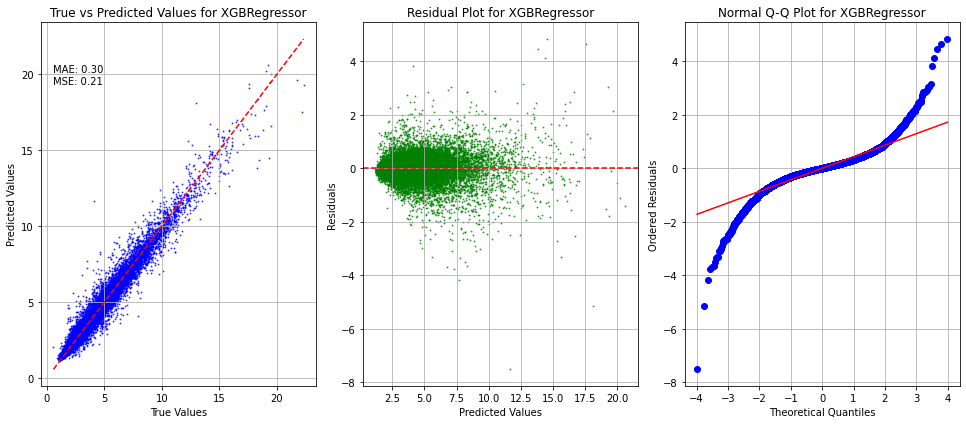

In [60]:
plot_predictions(y_test, y_pred, xgb.XGBRegressor)

#### Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
regressor = RandomForestRegressor(random_state=10)

# Define the hyperparameter grid
param_grid = {'n_estimators': [100, 500, 1000],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 50, 100, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5, n_jobs=-1)

X_d_train=x_train.iloc[:1000,:]
y_d_train=pd.DataFrame(y_train).iloc[:1000,-1]

# Fit the GridSearchCV object to the data
grid_search.fit(X_d_train, y_d_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [62]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=10, shuffle=False)

print("started training")

regr = RandomForestRegressor(**grid_search.best_params_, random_state=10, verbose = True)
print("initialised")

history=regr.fit(x_train, y_train)
print("training done")

# print(regr.predict())
print(regr.score(x_test, y_test))

y_pred = regr.predict(x_test)
regression_metrics(y_test, y_pred, x_test)

started training
initialised


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


training done


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9430541614843438


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


,Value
MAE,0.353338
MSE,0.284572
R-squared,0.943054
Adj R-squared,0.942994


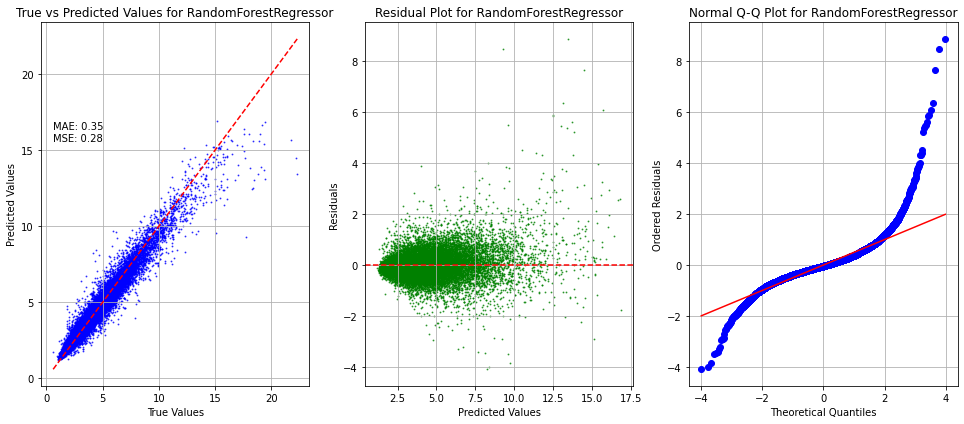

In [63]:
plot_predictions(y_test, y_pred, RandomForestRegressor)

#### Linear Regression

In [64]:
#rsquare test
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the data
model = LinearRegression().fit(x_train, y_train)

# Get the predicted values
y_pred = model.predict(x_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

regression_metrics(y_test, y_pred, x_test)

,Value
MAE,0.618092
MSE,0.812156
R-squared,0.837479
Adj R-squared,0.837307


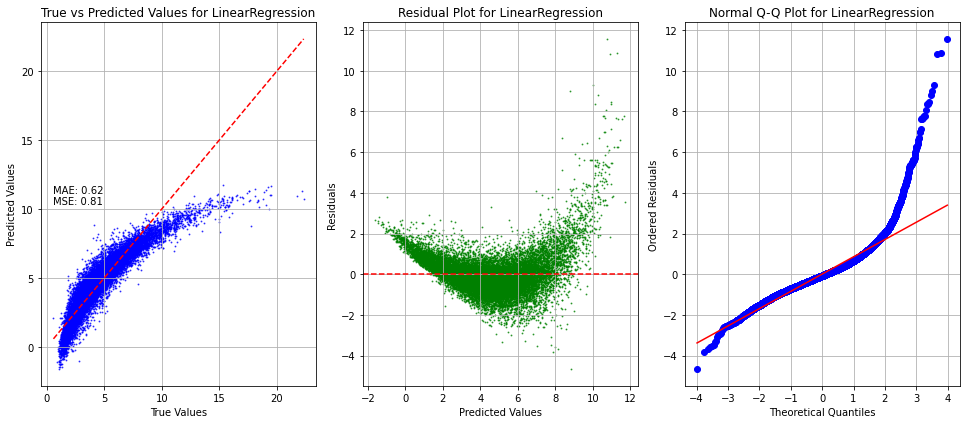

In [65]:
plot_predictions(y_test, y_pred, LinearRegression)

#### Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor object
regressor = DecisionTreeRegressor(random_state=10)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5)
X_d_train=x_train.iloc[:100000,:]
y_d_train=pd.DataFrame(y_train).iloc[:100000,-1]

# Fit the GridSearchCV object to the data
grid_search.fit(X_d_train, y_d_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [67]:
regressor = DecisionTreeRegressor(**grid_search.best_params_, random_state=10)
regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(x_test)

regression_metrics(y_test, y_pred, x_test)

,Value
MAE,0.339294
MSE,0.268395
R-squared,0.946292
Adj R-squared,0.946234


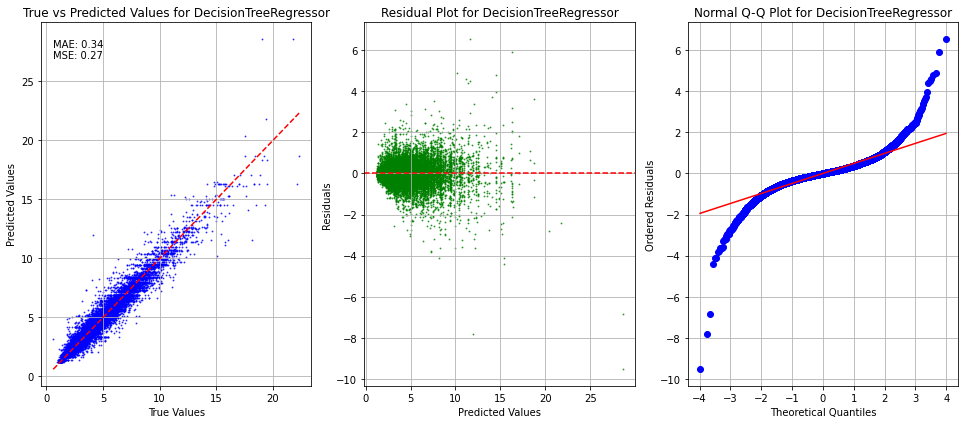

In [68]:
plot_predictions(y_test, y_pred, DecisionTreeRegressor)

#### Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression object
regressor = Ridge(random_state=10)

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print(grid_search.best_params_) 

{'alpha': 0.1}


In [70]:
ridge_regressor = Ridge(**grid_search.best_params_, random_state=10)

ridge_regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = ridge_regressor.predict(x_test)

regression_metrics(y_test, y_pred, x_test)

,Value
MAE,0.618036
MSE,0.812155
R-squared,0.837480
Adj R-squared,0.837307


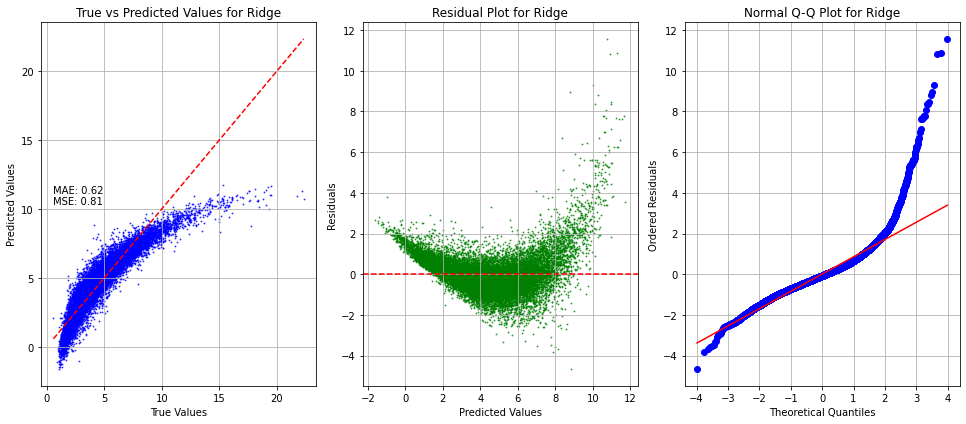

In [71]:
plot_predictions(y_test, y_pred, Ridge)

#### Lasso Regression

In [72]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression object
regressor = Lasso(random_state=10)

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(regressor, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'alpha': 0.001}


In [73]:
lasso_regressor = Lasso(**grid_search.best_params_, random_state=43)

lasso_regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = lasso_regressor.predict(x_test)

regression_metrics(y_test, y_pred, x_test)

,Value
MAE,0.625016
MSE,0.834672
R-squared,0.832974
Adj R-squared,0.832796


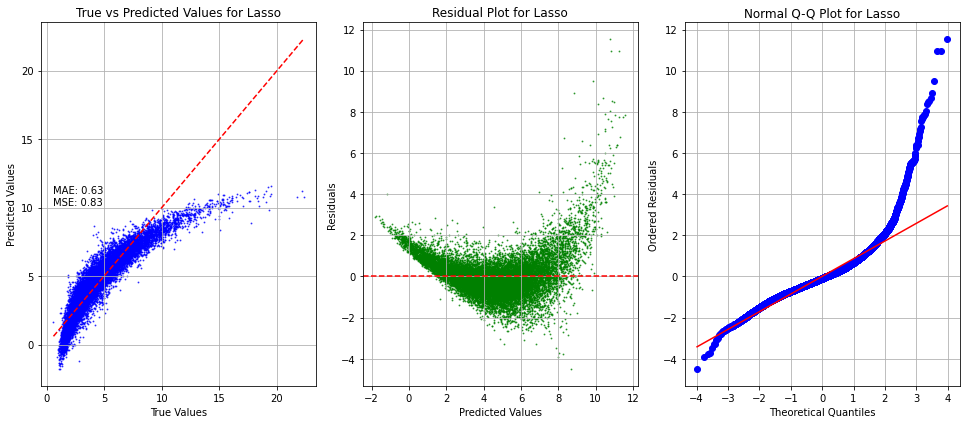

In [74]:
plot_predictions(y_test, y_pred, Lasso)

#### LightGBM

In [75]:
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV, train_test_split

# # Assuming you have x_train, x_test, y_train, and y_test defined

# # Create a LightGBM Dataset
# lgb_train = lgb.Dataset(x_train, label=y_train)

# # Define the hyperparameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.1, 1],
#     'num_leaves': [31, 100, 200],
#     # Add other LightGBM parameters you want to tune
# }

# # Define the LightGBM parameters
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     'metric': 'auc',
# }

# # Perform grid search using LightGBM's cv method
# gbm = lgb.cv(params, lgb_train, num_boost_round=100, nfold=5, stratified=True, metrics='auc')

# # Print the best number of boosting rounds
# print('Best number of boosting rounds:', len(gbm['auc-mean']))

# # Fit the model with the best number of boosting rounds
# best_num_boost_round = len(gbm['auc-mean'])
# best_model = lgb.train(params, lgb_train, num_boost_round=best_num_boost_round)

In [76]:
# # Create the LightGBM model with best parameters
# lgbm_model = lgb.LGBMClassifier(**grid_search.best_params_,random_state=0)  # Change to LGBMRegressor if regression task

# # Train the LightGBM model
# lgbm_model.fit(x_train, y_train)

# # Make predictions on the testing data
# y_pred = lgbm_model.predict(x_test)

# regression_metrics(y_test, y_pred, x_test)